In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import sqlite3
import pandas as pd
import networkx as nx

In [27]:
papers = []
authors = []
conn = sqlite3.connect('hw1.sqlite',timeout=10)
for row in conn.execute('SELECT * FROM paper'):
    papers.append({'id':row[0],'paper_name':row[1]})
conn.close()

conn = sqlite3.connect('hw1.sqlite',timeout=10)
for row in conn.execute('SELECT * FROM author'):
    authors.append({'id':row[0],'author_name':row[1]})
conn.close()

In [43]:
# Cria lista de arestas para rede de autores
query_pair_authors = """
SELECT paper_id,
       a1.author_id AS author1,
       a2.author_id AS author2
FROM author_paper AS a1
JOIN author_paper AS a2 USING (paper_id)
WHERE a1.author_id < a2.author_id;
"""
conn = sqlite3.connect('hw1.sqlite')
edges_authors = []
for row in conn.execute(query_pair_authors):
    edges_authors.append(row)
conn.close()
edges_authors= pd.DataFrame(edges_authors,dtype=int,columns=['paper','author1','author2'])

# Cria lista de arestas para rede de papers
query_pair_papers = """
SELECT author_id,
       a1.paper_id AS paper1,
       a2.paper_id AS paper2
FROM author_paper AS a1
JOIN author_paper AS a2 USING (author_id)
WHERE a1.paper_id < a2.paper_id;
"""
conn = sqlite3.connect('hw1.sqlite')
edges_papers = []
for row in conn.execute(query_pair_papers):
    edges_papers.append(row)
conn.close()
edges_papers = pd.DataFrame(edges_papers,columns=['author',
                                                  'paper1','paper2']).applymap(lambda x: int(x))


count_authors = edges_authors.groupby(['author1','author2']).count().reset_index()
count_papers  = edges_papers.groupby(['paper1','paper2']).count().reset_index()

In [56]:
edges_authors.applymap(lambda x: int(x)).dtypes

paper      int64
author1    int64
author2    int64
dtype: object

In [30]:
# Inserindo somente os nós e seus atributos

G_authors = nx.Graph()
G_papers = nx.Graph()

for d in authors: 
    node_id = d.pop('id')
    G_authors.add_node(node_id, **d) 
    
for d in papers: 
    node_id = d.pop('id')
    G_papers.add_node(node_id, **d) 

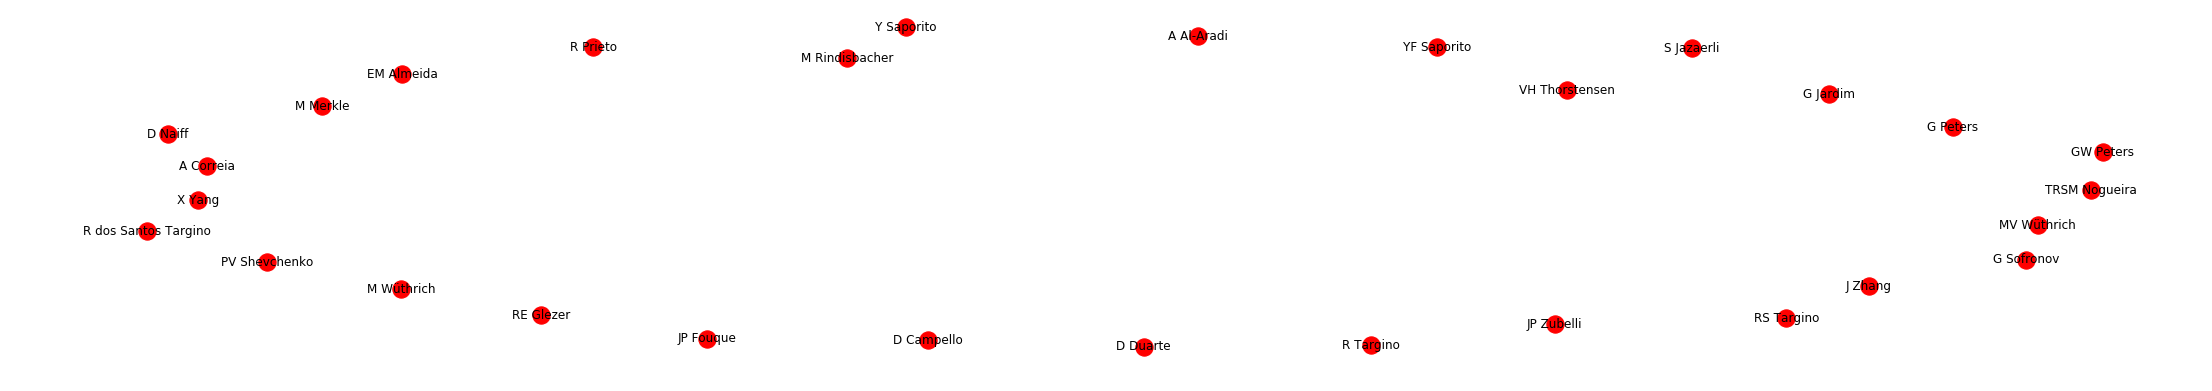

In [31]:
plt.figure(figsize=(30,5))
labels=dict((n,d['author_name']) for n,d in G_authors.nodes(data=True))
nx.draw_spring(G_authors,labels=labels,with_labels=True)

In [32]:
# Inserir as arestas
for d in count_authors.to_dict('records'):
    G_authors.add_edge(d['author1'],d['author2'],count = d['paper'])
    
for d in count_papers.to_dict('records'):
    G_papers.add_edge(d['paper1'],d['paper2'],count = d['author'])

/home/davi/Envs/datascience/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


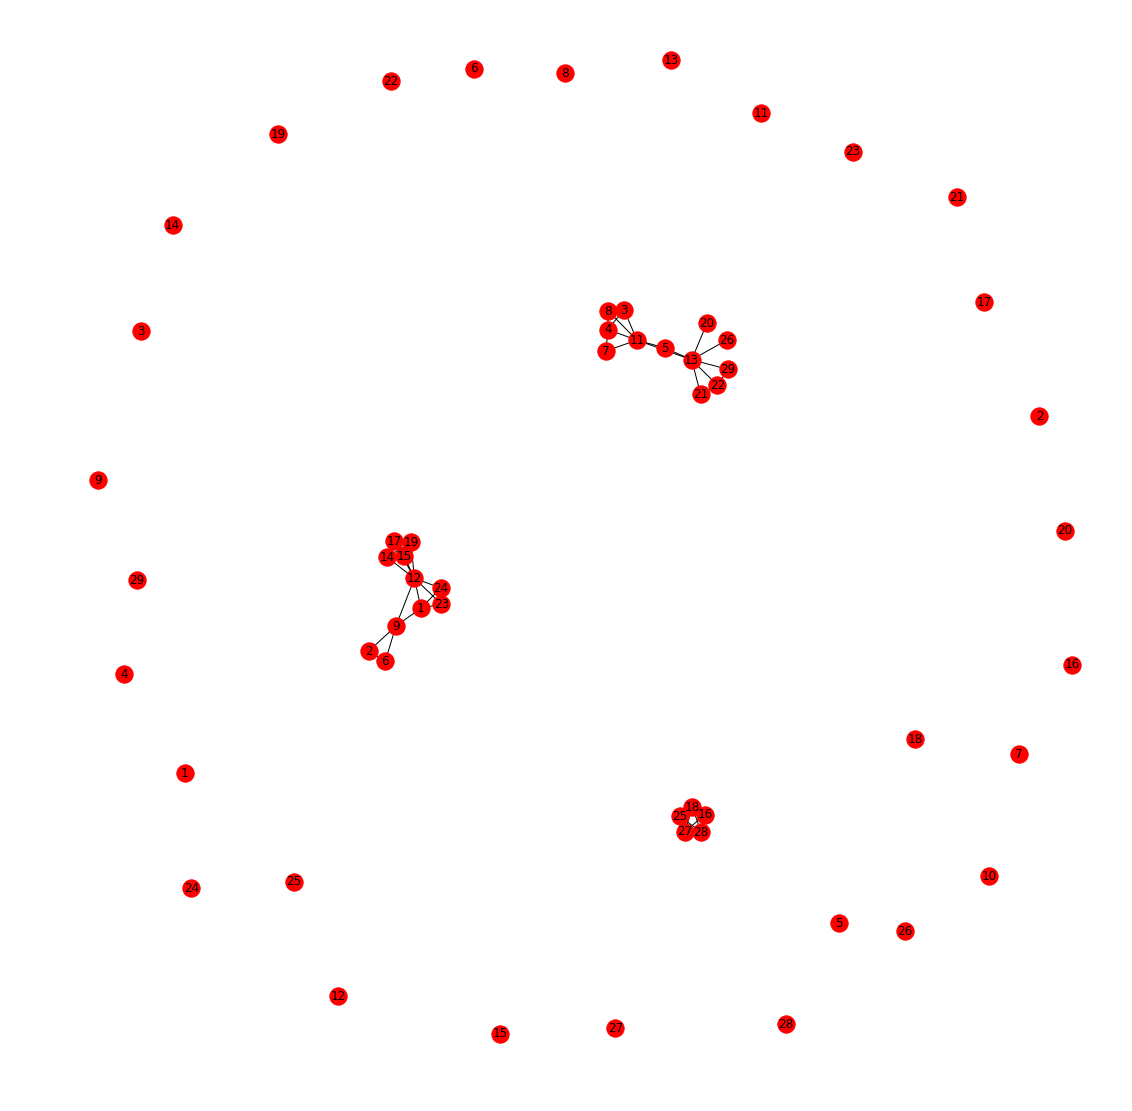

In [33]:
plt.figure(figsize=(15,15))
nx.draw_spring(G_authors,with_labels=True)

In [36]:
list(G_authors.nodes(data=True))

[(1, {'author_name': 'D Duarte'}),
 (2, {'author_name': 'G Peters'}),
 (3, {'author_name': 'G Sofronov'}),
 (4, {'author_name': 'GW Peters'}),
 (5, {'author_name': 'M Merkle'}),
 (6, {'author_name': 'M Wüthrich'}),
 (7, {'author_name': 'MV Wüthrich'}),
 (8, {'author_name': 'PV Shevchenko'}),
 (9, {'author_name': 'R Targino'}),
 (10, {'author_name': 'R dos Santos Targino'}),
 (11, {'author_name': 'RS Targino'}),
 (12, {'author_name': 'Y Saporito'}),
 (13, {'author_name': 'YF Saporito'}),
 (14, {'author_name': 'A Al-Aradi'}),
 (15, {'author_name': 'A Correia'}),
 (16, {'author_name': 'D Campello'}),
 (17, {'author_name': 'D Naiff'}),
 (18, {'author_name': 'EM Almeida'}),
 (19, {'author_name': 'G Jardim'}),
 (20, {'author_name': 'J Zhang'}),
 (21, {'author_name': 'JP Fouque'}),
 (22, {'author_name': 'JP Zubelli'}),
 (23, {'author_name': 'M Rindisbacher'}),
 (24, {'author_name': 'R Prieto'}),
 (25, {'author_name': 'RE Glezer'}),
 (26, {'author_name': 'S Jazaerli'}),
 (27, {'author_name': '